# **BASE DE DATOS DE PRECIOS PRODUCTOS AGRÍCOLAS**





In [345]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/precios_pdtos_agricolas.cvs')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,n.d.,n.d.,29ago2023,11.121894,-73.885279


In [346]:
#Encontrar datos duplicados previamente al reemplazo de datos faltantes (se necesitará para el análisis del punto 5)
bool = (df['precio'] != 'n.d.') & df.duplicated(subset='precio', keep='first')
duplicados_sin_nd = df[bool]
duplicados_sin_nd

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
8,Arveja verde en vaina,pereira,7200,n.d.,01ago2023,4.803663,-75.795791
62,Habichuela,neiva,2453,-0.04,01ago2023,2.993360,-75.272362
75,Lechuga batavia,santa marta,2500,-0.02,01ago2023,11.121894,-73.885279
77,Pepino cohombro,armenia,1500,0,01ago2023,4.499501,-75.724900
81,Pepino cohombro,cúcuta,1667,0.67,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8843,Plátano hartón verde,tunja,2150,0,29ago2023,5.518473,-73.378019
8844,Yuca*,armenia,1640,0,29ago2023,4.499501,-75.724900
8848,Yuca*,cúcuta,2600,0.03,29ago2023,NaN,NaN
8850,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031


# **1.** Justificación de la necesidad de redefinir variables y redefinición si es necesaria

In [347]:
# Información sobre tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      8855 non-null   object 
 1   ciudad        8855 non-null   object 
 2   precio        8855 non-null   object 
 3   variabilidad  8855 non-null   object 
 4   fecha         8855 non-null   object 
 5   LATITUD       8050 non-null   float64
 6   LONGITUD      8050 non-null   float64
dtypes: float64(2), object(5)
memory usage: 484.4+ KB


In [348]:
#Redefinición de variables, 'precio' y 'variabilidad', de 'object' a 'numeric' (en este caso terminaron siendo 'float')
#Primero reemplazar 'n.d'. con 'NaN', para así, luego cambiar el formato
df['precio']=df['precio'].replace(['n.d.'], np.nan)
df['variabilidad']=df['variabilidad'].replace(['n.d.'], np.nan)

df['precio']=pd.to_numeric(df['precio'], errors='coerce', downcast='integer')
df['variabilidad']=pd.to_numeric(df['variabilidad'], errors='coerce', downcast='float')

# **2.** Justificación de la necesidad de categorizar variables y categorización si es necesaria

In [349]:
# Sí existe una necesidad de categorizar el 'precio' y 'variabilidad', pero se decidió imputar nulos y mirar duplicados antes,
# además de convertir a un formato deseado las variables a categorizar (paso 1, 3 y 4 antes de este)
#IMPORTANTE: La respuesta a este punto está después del 4


# **3.** Identificación de datos faltantes, justificación y uso de la estrategia de tratamiento de datos faltantes

In [350]:
#1. Indentificación de variables con datos faltantes (NaN)
df.isnull().any()


producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [351]:
# Valores faltantes (NaN) de cada columna
print(df.isnull().sum())

producto           0
ciudad             0
precio          2186
variabilidad    2329
fecha              0
LATITUD          805
LONGITUD         805
dtype: int64


In [352]:
# Valores faltantes (NaN) de columna 'LATITUD'
bool = pd.isnull(df['LATITUD'])
df[bool]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,NaN,NaN
15,Cebolla cabezona blanca,cúcuta,1958.0,-0.15,01ago2023,NaN,NaN
26,Cebolla junca,cúcuta,1341.0,0.34,01ago2023,NaN,NaN
37,Chócolo mazorca,cúcuta,1364.0,0.25,01ago2023,NaN,NaN
48,Fríjol verde*,cúcuta,NaN,NaN,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8804,Papa negra*,cúcuta,NaN,NaN,29ago2023,NaN,NaN
8815,Papa criolla,cúcuta,2883.0,0.06,29ago2023,NaN,NaN
8826,Plátano guineo,cúcuta,NaN,NaN,29ago2023,NaN,NaN
8837,Plátano hartón verde,cúcuta,2758.0,0.00,29ago2023,NaN,NaN


In [353]:
# Valores faltantes (NaN) columna 'LONGITUD'
bool = pd.isnull(df['LONGITUD'])
df[bool]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,NaN,NaN
15,Cebolla cabezona blanca,cúcuta,1958.0,-0.15,01ago2023,NaN,NaN
26,Cebolla junca,cúcuta,1341.0,0.34,01ago2023,NaN,NaN
37,Chócolo mazorca,cúcuta,1364.0,0.25,01ago2023,NaN,NaN
48,Fríjol verde*,cúcuta,NaN,NaN,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8804,Papa negra*,cúcuta,NaN,NaN,29ago2023,NaN,NaN
8815,Papa criolla,cúcuta,2883.0,0.06,29ago2023,NaN,NaN
8826,Plátano guineo,cúcuta,NaN,NaN,29ago2023,NaN,NaN
8837,Plátano hartón verde,cúcuta,2758.0,0.00,29ago2023,NaN,NaN


In [354]:
#Imputación de datos faltantes (NaN) en columnas 'LATITUD' y 'LONGITUD'
#Al pertencer a la misma ciudad: Cúcuta, se procede a obtener la información real sobre estos aspectos.
#Y reemplarlos en el datframe
import numpy as np
df['LATITUD'] = df['LATITUD'].fillna(7.89391)
df['LONGITUD'] = df['LONGITUD'].fillna(-72.50782)



In [355]:
# Ahora quedan las variables 'precio' y 'variabilidad' con datos faltantes (NaN)
df.isnull().any()


producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD         False
LONGITUD        False
dtype: bool

In [356]:
print(df.isnull().sum())

producto           0
ciudad             0
precio          2186
variabilidad    2329
fecha              0
LATITUD            0
LONGITUD           0
dtype: int64


In [357]:
#Imputación de datos faltantes (NaN) en columnas 'precio' y 'variabilidad'
#Primero, ya se reemplazaron los datos n.d. a NaN en el punto 1, entonces
#como segundo paso, es reemplazarlos por datos más consistentes con la lógica de la variable.

#Se aplicará para cada caso el reemplazo por la media teniendo en cuenta cada producto (grupo o categoría)
df['precio'] = df.groupby('producto')['precio'].transform(lambda x: x.fillna(x.mean()))
df['variabilidad'] = df.groupby('producto')['variabilidad'].transform(lambda x: x.fillna(x.mean()))
df


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.00000,0.10000,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.00000,0.11000,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.00000,0.08000,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.00000,-0.03000,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.00000,0.11000,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.00000,0.06000,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1778.22561,-0.00358,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.00000,0.01000,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1778.22561,-0.00358,29ago2023,11.121894,-73.885279


In [358]:
#Redondeo de valores de columnas 'precio' y'variabilidad'
df['precio'] = df['precio'].round(1)
df['variabilidad'] = df['variabilidad'].round(2)
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1778.2,-0.00,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1778.2,-0.00,29ago2023,11.121894,-73.885279


# **4.**	Identificación de datos duplicados, justificación y uso de la estrategia de tratamiento de datos duplicados

In [359]:
# Identificación de filas duplicadas en columna 'producto'
# Los duplicados en esta columna son normales, debido a que son mismos productos,
# pero distintas ciudades
duplicados = df.duplicated(subset=['producto'])
print(duplicados)

0       False
1        True
2        True
3        True
4        True
        ...  
8850     True
8851     True
8852     True
8853     True
8854     True
Length: 8855, dtype: bool


In [360]:
# Identificación de filas duplicadas en columna 'ciudad'
# En este caso igual es normal tener duplicados, por lo que son productos
# que se repiten en ciudades y se repite esta misma en dataframe para cada producto
duplicados = df.duplicated(subset=['ciudad'])
print(duplicados)

0       False
1       False
2       False
3       False
4       False
        ...  
8850     True
8851     True
8852     True
8853     True
8854     True
Length: 8855, dtype: bool


In [361]:
# Identificación de filas duplicadas en columna 'precio'
# Para este caso el hay precios duplicados en ciertos productos debido,
# a que algunos datos faltantes fueron reemplazados por la media,
# (la cual se repite tantas veces haya datos faltantes)

duplicados = df.duplicated(subset=['precio'], keep='first')
duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8850     True
8851     True
8852     True
8853     True
8854     True
Length: 8855, dtype: bool

In [362]:
duplicados = duplicados.sum()
duplicados

7127

In [363]:
# Filas duplicadas
duplicados = df.duplicated()
print(df[duplicados])


             producto   ciudad  precio  variabilidad      fecha   LATITUD  \
858   Chócolo mazorca  pereira  1304.3          0.01  03ago2023  4.803663   
970         Zanahoria  pereira  1149.1          0.01  03ago2023  4.803663   
1264   Plátano guineo  pereira  1590.6          0.01  03ago2023  4.803663   
2748  Chócolo mazorca  pereira  1304.3          0.01  10ago2023  4.803663   
2860        Zanahoria  pereira  1149.1          0.01  10ago2023  4.803663   
2902             Coco  pereira  5349.4         -0.00  10ago2023  4.803663   
3154   Plátano guineo  pereira  1590.6          0.01  10ago2023  4.803663   
5093  Chócolo mazorca  pereira  1304.3          0.01  17ago2023  4.803663   
5205        Zanahoria  pereira  1149.1          0.01  17ago2023  4.803663   
5499   Plátano guineo  pereira  1590.6          0.01  17ago2023  4.803663   
6983  Chócolo mazorca  pereira  1304.3          0.01  24ago2023  4.803663   
7095        Zanahoria  pereira  1149.1          0.01  24ago2023  4.803663   

# **Importante:** Continuación de punto 2 (ahora sí categorización)

In [364]:

max_precio= df['precio'].max()
max_precio

10000.0

In [365]:
min_precio= df['precio'].min()
min_precio

339.0

In [366]:
max_variabilidad= df['variabilidad'].max()
max_variabilidad

1.06

In [367]:
min_variabilidad= df['variabilidad'].min()
min_variabilidad

-0.46

In [368]:
#Ahora sí, categorización
import math
#Establecer límites de los intervalos y categorías de 'precio'
#Teniendo en cuenta los valores máximos y mínimos de cada columna calculados previamente
intervalos = [-math.inf, 2000, 7000, math.inf] #menores a 2000 son económicos, entre ambos valores, asequibles y mayores de 7000 son costosos
categorias = ['Economico', 'Asequible', 'Costoso']

# Categorias
df['precio_categoria'] = pd.cut(df['precio'], bins = intervalos, labels = categorias)
df.head()

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900,Costoso
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073,Costoso
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570,Asequible
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493,Costoso
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,7.893910,-72.507820,Costoso


In [369]:
import math
#Establecer límites de los intervalos y categorías de 'variabilidad'
#Teniendo en cuenta los valores máximos y mínimos de cada columna calculados previamente
intervalos = [-math.inf, -0.01, 0.06, math.inf] #Menor a -0.01 significa disminución, entre ambos valores se mantuvo y mayor a 0.06, aumentó
categorias = ['Disminuyó', 'Se mantuvo', 'Aumentó']

# Categorías
df['tipo_de_variabilidad'] = pd.cut(df['variabilidad'], bins = intervalos, labels = categorias)
df.head()

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900,Costoso,Aumentó
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073,Costoso,Aumentó
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570,Asequible,Aumentó
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493,Costoso,Disminuyó
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,7.893910,-72.507820,Costoso,Aumentó


# **5.** Identificación de datos outliers, justificación y uso de la estrategia de tratamiento de datos outliers

**Descripción de variable Precio**

In [370]:
#Estrategias a utilizar 30:07
#1. Descripción de las variables cuantitativas para este caso
#Precio
df['precio'].describe()

#El percentil 25, es decir, el 25% de los precios están por debajo de 1733.53, y está muy alejado del valor mínimo (339)
#El percentil 75, es decir, el 75% de los precios están por debajo de 3964.31, y está muy alejado del valor máx (10000)
##Sin embargo, a partir de lo anterior no se podría identificar correctamente outliers, debido a que estamos tratando con
##diferentes productos o categorías, por lo tanto es lógico que existan valores tan atípicos, lo mejor en este caso es
##Analizar cada producto

count     8855.000000
mean      3240.278148
std       1965.551664
min        339.000000
25%       1733.500000
50%       2850.000000
75%       3964.300000
max      10000.000000
Name: precio, dtype: float64

**Histograma y Boxplot de variable Precio**

Text(0, 0.5, 'Cantidad')

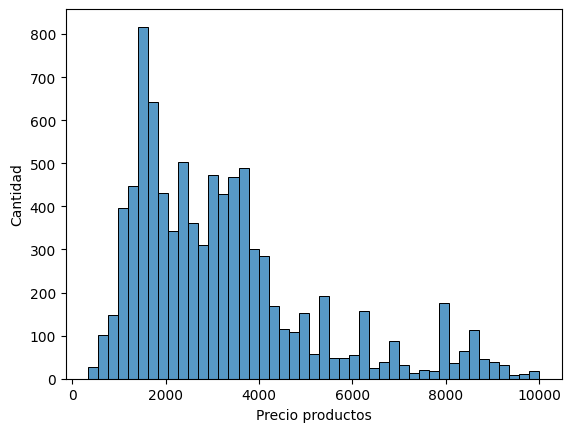

In [371]:
import seaborn as sns
fig = sns.histplot(data = df, x = 'precio')

fig.set_xlabel('Precio productos')
fig.set_ylabel('Cantidad')

Text(0.5, 0, 'Precio')

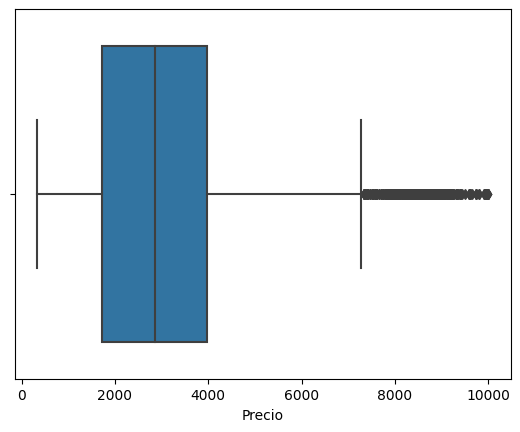

In [372]:
import seaborn as sns
# boxplot para columna o variable 'precio'
fig = sns.boxplot(data = df, x = 'precio')
fig.set_xlabel('Precio')

#Se observan muchos outliers por encima del tercer cuartil

**Rango Intercuartílico de variable Precio**

In [373]:
# Cuartiles
Q3 = df['precio'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1 = df['precio'].quantile(0.25) # Primer cuartil + Percentil 25

#  RIC
ric = Q3 - Q1

# Limite inferior y superior
superior = Q3 + (1.5 * ric)
inferior = Q1 - (1.5* ric)

# Identificación outliers
outliers_RIC = df[(df['precio'] < inferior) | (df['precio'] > superior)]
outliers_RIC

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073,Costoso,Aumentó
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493,Costoso,Disminuyó
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,7.893910,-72.507820,Costoso,Aumentó
160,Coco,medellín,8483.0,0.01,01ago2023,6.257590,-75.611031,Costoso,Se mantuvo
167,Granadilla,bucaramanga,7500.0,-0.09,01ago2023,7.155834,-73.111570,Costoso,Disminuyó
...,...,...,...,...,...,...,...,...,...
8718,Manzana royal gala,medellín,8224.0,0.01,29ago2023,6.257590,-75.611031,Costoso,Se mantuvo
8719,Manzana royal gala,neiva,9079.0,0.00,29ago2023,2.993360,-75.272362,Costoso,Se mantuvo
8720,Manzana royal gala,pereira,8539.5,-0.00,29ago2023,4.803663,-75.795791,Costoso,Se mantuvo
8721,Manzana royal gala,santa marta,8539.5,-0.00,29ago2023,11.121894,-73.885279,Costoso,Se mantuvo


**Descripción de las categorías (productos) de la variable Precio**

In [374]:
# Descripción de cada producto para identificación de outliers en cada categoría (aguacates, arracacha, arveja...)
df.groupby('producto')['precio'].describe()

#Para este caso los productos que posiblemnente presenten datos atípicos son el frijol verde, el limón común y plátano hartón verde,
#dedibo más que nada a una gran diferencia en sus precios comparando el valor máximo con el percentil 75

,count,mean,std,min,25%,50%,75%,max
producto,,,,,,,,
Aguacate *,220.0,4957.031818,755.258953,3400.0,4491.75,4957.0,5500.00,6833.0
Aguacate*,33.0,4969.600000,764.006365,3400.0,4500.00,4969.6,5500.00,6938.0
Arracacha*,253.0,3660.126087,547.200476,2050.0,3484.00,3660.1,3867.00,5867.0
Arveja verde en vaina,253.0,6891.902767,1339.440066,3850.0,6200.00,6891.9,7467.00,10000.0
Banano*,253.0,1588.462451,365.713422,656.0,1333.00,1588.5,1867.00,2242.0
Cebolla cabezona blanca,253.0,2989.211858,520.663070,1467.0,2750.00,3099.0,3300.00,4156.0
Cebolla junca,253.0,2374.478261,827.842911,600.0,1954.00,2374.5,2667.00,5042.0
Chócolo mazorca,253.0,1304.333992,367.658079,519.0,1000.00,1304.3,1500.00,2275.0
Coco,253.0,5349.400791,1030.845385,3222.0,5100.00,5349.4,5349.40,8483.0


**Histograma por producto (limón común) y sus precios**

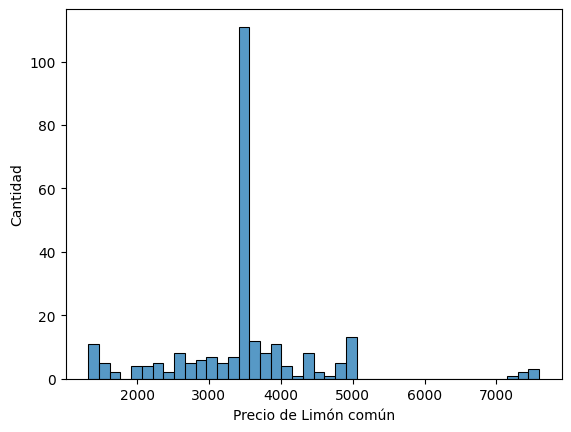

In [375]:
import matplotlib.pyplot as plt
df_producto_especifico = df[df['producto'] == 'Limón común']

fig = sns.histplot(data=df_producto_especifico, x='precio')
fig.set_xlabel('Precio de ' + 'Limón común')
fig.set_ylabel('Cantidad')

plt.show()

#Sí se observan datos atípicos, pero esto se puede deber a diversas razones a nivel macroecómico, demanda, oferta e inflación, además,
# causas climatológicas de cada ciudad, sequías, lluvias extremas, etc

**Descripción de variable Variabilidad**

In [376]:
df['variabilidad'].describe()

#El percentil 25, es decir, el 25% de la variabilidad está por debajo de -0.020 , y está algo alejado del valor mínimo (-0.46)
#El percentil 75, es decir, el 75% de la variabilidad está por debajo de 0.020, y está muy alejado del valor máx (1.06
##Sin embargo, se concluye lo mismo que con el precio y es mejor analizar la variabilidad respecto al producto (categorías)

count    8855.000000
mean        0.002862
std         0.081884
min        -0.460000
25%        -0.020000
50%         0.000000
75%         0.020000
max         1.060000
Name: variabilidad, dtype: float64

**Histograma y Boxplot de variable Variabilidad**

Text(0, 0.5, 'Cantidad')

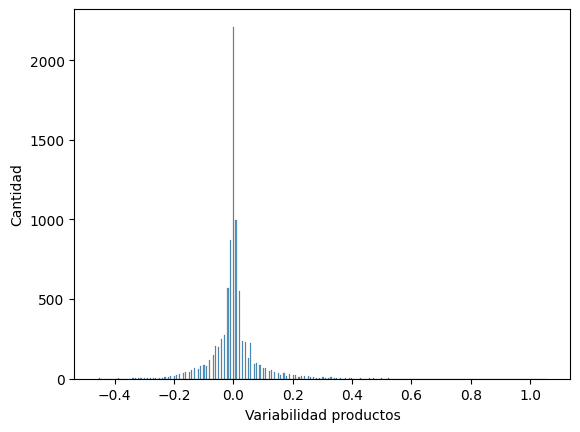

In [377]:
fig = sns.histplot(data = df, x = 'variabilidad')

fig.set_xlabel('Variabilidad productos')
fig.set_ylabel('Cantidad')

Text(0.5, 0, 'Variabilidad')

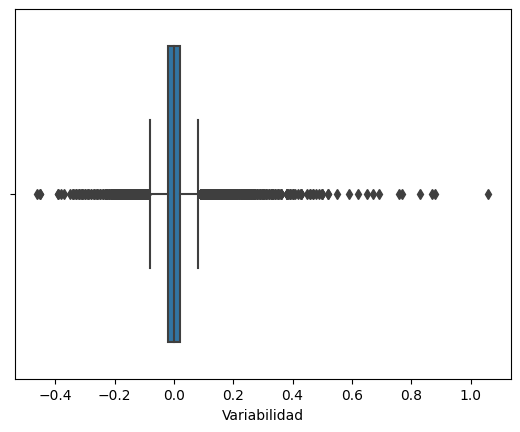

In [378]:
import seaborn as sns
# boxplot para columna o variable 'variabilidad'
fig = sns.boxplot(data = df, x = 'variabilidad')
fig.set_xlabel('Variabilidad')

#Se observa muchos outliers sobre todo por encima del tercer cuartil y por debajo del primer cuartil

**Rango Intercuartílico de variable Variabilidad**

In [379]:
# Calcular cuartiles a partir de la función percentil
Q3 = df['variabilidad'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1 = df['variabilidad'].quantile(0.25) # Primer cuartil + Percentil 25

# Obtener RIC
ric = Q3 - Q1

# Definir limite inferior y superior
superior = Q3 + (1.5 * ric)
inferior = Q1 - (1.5* ric)

# Identificar outliers
outliers_RIC = df[(df['variabilidad'] < inferior) | (df['variabilidad'] > superior)]
outliers_RIC

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900,Costoso,Aumentó
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073,Costoso,Aumentó
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,7.893910,-72.507820,Costoso,Aumentó
7,Arveja verde en vaina,neiva,5653.0,-0.12,01ago2023,2.993360,-75.272362,Asequible,Disminuyó
11,Cebolla cabezona blanca,armenia,2000.0,0.09,01ago2023,4.499501,-75.724900,Economico,Aumentó
...,...,...,...,...,...,...,...,...,...
8795,Arracacha*,medellín,3719.0,0.12,29ago2023,6.257590,-75.611031,Asequible,Aumentó
8813,Papa criolla,bucaramanga,2860.0,0.12,29ago2023,7.155834,-73.111570,Asequible,Aumentó
8817,Papa criolla,medellín,3525.0,-0.10,29ago2023,6.257590,-75.611031,Asequible,Disminuyó
8819,Papa criolla,pereira,3533.0,0.11,29ago2023,4.803663,-75.795791,Asequible,Aumentó


# **6.** Justificación de la necesidad de normalizar o estandarizar variables

**Estandarización de variables Precio y Variabilidad**

In [380]:
import scipy
from scipy import stats
df_copy=df.copy()  #se requiere una copia del dataframe para no modificar el original
df_copy['precio'] = stats.zscore(df['precio'])
df_copy['variabilidad'] = stats.zscore(df['variabilidad'])
df_copy.head()
df_copy

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
0,Arveja verde en vaina,armenia,2.014674,1.186362,01ago2023,4.499501,-75.724900,Costoso,Aumentó
1,Arveja verde en vaina,bogotá,2.383548,1.308493,01ago2023,4.316108,-74.181073,Costoso,Aumentó
2,Arveja verde en vaina,bucaramanga,1.841685,0.942100,01ago2023,7.155834,-73.111570,Asequible,Aumentó
3,Arveja verde en vaina,cali,2.285860,-0.401343,01ago2023,3.399044,-76.576493,Costoso,Disminuyó
4,Arveja verde en vaina,cúcuta,3.142665,1.308493,01ago2023,7.893910,-72.507820,Costoso,Aumentó
...,...,...,...,...,...,...,...,...,...
8850,Yuca*,medellín,-0.809120,0.697837,29ago2023,6.257590,-75.611031,Economico,Se mantuvo
8851,Yuca*,neiva,-0.743893,-0.034950,29ago2023,2.993360,-75.272362,Economico,Se mantuvo
8852,Yuca*,pereira,-0.936318,0.087181,29ago2023,4.803663,-75.795791,Economico,Se mantuvo
8853,Yuca*,santa marta,-0.743893,-0.034950,29ago2023,11.121894,-73.885279,Economico,Se mantuvo


# **7.**	Mínimo 5 preguntas que quiera resolver a partir del filtrado de columnas o filas

In [381]:
#1. Ciudades con aguacates asequibles durante todo el mes de agosto
ciudades_costosas_aguacate = df[(df['producto'].isin(['Aguacate*', 'Aguacate *'])) & (df['precio_categoria'] == 'Asequible')]
ciudades_costosas_aguacate

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
132,Aguacate*,armenia,3833.0,0.25,01ago2023,4.499501,-75.724900,Asequible,Aumentó
133,Aguacate*,bogotá,5575.0,-0.03,01ago2023,4.316108,-74.181073,Asequible,Disminuyó
134,Aguacate*,bucaramanga,5500.0,0.00,01ago2023,7.155834,-73.111570,Asequible,Se mantuvo
135,Aguacate*,cali,4600.0,0.02,01ago2023,3.399044,-76.576493,Asequible,Se mantuvo
136,Aguacate*,cúcuta,4833.0,-0.09,01ago2023,7.893910,-72.507820,Asequible,Disminuyó
...,...,...,...,...,...,...,...,...,...
8608,Aguacate*,medellín,5438.0,0.08,29ago2023,6.257590,-75.611031,Asequible,Aumentó
8609,Aguacate*,neiva,6250.0,-0.05,29ago2023,2.993360,-75.272362,Asequible,Disminuyó
8610,Aguacate*,pereira,5333.0,0.09,29ago2023,4.803663,-75.795791,Asequible,Aumentó
8611,Aguacate*,santa marta,4969.6,0.04,29ago2023,11.121894,-73.885279,Asequible,Se mantuvo


In [382]:
#2. Productos de la ciudad de medellín con precios económicos y que tengan una variabilidad que refleje su disminución
filtro_medellin = df[(df['ciudad'] == 'medellín') & (df['precio_categoria'] == 'Economico')  & (df['tipo_de_variabilidad'] == 'Disminuyó')]
filtro_medellin

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
17,Cebolla cabezona blanca,medellín,1927.0,-0.05,01ago2023,6.25759,-75.611031,Economico,Disminuyó
72,Lechuga batavia,medellín,859.0,-0.07,01ago2023,6.25759,-75.611031,Economico,Disminuyó
358,Plátano guineo,medellín,1300.0,-0.02,01ago2023,6.25759,-75.611031,Economico,Disminuyó
380,Yuca*,medellín,1830.0,-0.05,01ago2023,6.25759,-75.611031,Economico,Disminuyó
924,Pimentón,medellín,1125.0,-0.02,03ago2023,6.25759,-75.611031,Economico,Disminuyó
...,...,...,...,...,...,...,...,...,...
8210,Guayaba*,medellín,1900.0,-0.03,28ago2023,6.25759,-75.611031,Economico,Disminuyó
8542,Lechuga batavia,medellín,789.0,-0.10,29ago2023,6.25759,-75.611031,Economico,Disminuyó
8564,Pimentón,medellín,975.0,-0.03,29ago2023,6.25759,-75.611031,Economico,Disminuyó
8751,Naranja*,medellín,1925.0,-0.08,29ago2023,6.25759,-75.611031,Economico,Disminuyó


In [383]:
from pandas.io.pytables import TableIterator
#3. Precios más bajos y el más alto de cada ciudad

Económicos = df.groupby('ciudad')['precio'].min()
Costosos = df.groupby('ciudad')['precio'].max()
tabla= pd.DataFrame({'Producto con precio más bajo': Económicos, 'Producto con precio más alto': Costosos})
tabla

,Producto con precio más bajo,Producto con precio más alto
ciudad,,
armenia,857.0,8421.0
barranquilla,1044.0,9967.0
bogotá,500.0,9397.0
bucaramanga,820.0,9733.0
cali,750.0,9600.0
cartagena,519.0,8539.5
cúcuta,600.0,10000.0
ibagué,1075.0,9386.0
manizales,900.0,9800.0


In [384]:
#4. Los tres productos más económicos registrados
productos_mas_economicos= df.nsmallest(3, 'precio')
productos_mas_economicos

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
8140,Zanahoria,medellín,339.0,-0.01,28ago2023,6.25759,-75.611031,Economico,Se mantuvo
8597,Zanahoria,medellín,342.0,0.01,29ago2023,6.25759,-75.611031,Economico,Se mantuvo
2856,Zanahoria,medellín,344.0,-0.10,10ago2023,6.25759,-75.611031,Economico,Disminuyó


In [385]:
#Los tres productos más costosos registrados
productos_mas_caros= df.nlargest(3, 'precio')
productos_mas_caros

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
4048,Mango tommy,pereira,10000.0,0.09,14ago2023,4.803663,-75.795791,Costoso,Aumentó
4239,Arveja verde en vaina,cúcuta,10000.0,0.04,15ago2023,7.893910,-72.507820,Costoso,Se mantuvo
4878,Mango tommy,pereira,10000.0,0.00,16ago2023,4.803663,-75.795791,Costoso,Se mantuvo


In [386]:
#5. Productos de la ciudad de Bucaramanga que tuvieron un precio menor o igual a 3000 en la fecha 29ago2023
filtro_Bucaramanga = df[(df['ciudad'] == 'bucaramanga') & (df['precio'] <= 3000) & (df['fecha'] == '29ago2023')]
filtro_Bucaramanga

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,precio_categoria,tipo_de_variabilidad
8483,Cebolla cabezona blanca,bucaramanga,2660.0,0.01,29ago2023,7.155834,-73.11157,Asequible,Se mantuvo
8494,Cebolla junca,bucaramanga,1656.0,0.00,29ago2023,7.155834,-73.11157,Economico,Se mantuvo
8505,Chócolo mazorca,bucaramanga,1144.0,-0.01,29ago2023,7.155834,-73.11157,Economico,Se mantuvo
8516,Fríjol verde*,bucaramanga,2260.0,0.02,29ago2023,7.155834,-73.11157,Asequible,Se mantuvo
8538,Lechuga batavia,bucaramanga,1688.0,-0.01,29ago2023,7.155834,-73.11157,Economico,Se mantuvo
8549,Pepino cohombro,bucaramanga,1220.0,-0.27,29ago2023,7.155834,-73.11157,Economico,Disminuyó
8560,Pimentón,bucaramanga,2325.0,0.03,29ago2023,7.155834,-73.11157,Asequible,Se mantuvo
8571,Remolacha,bucaramanga,1171.0,0.00,29ago2023,7.155834,-73.11157,Economico,Se mantuvo
8593,Zanahoria,bucaramanga,1575.0,0.04,29ago2023,7.155834,-73.11157,Economico,Se mantuvo
8615,Banano*,bucaramanga,1867.0,0.00,29ago2023,7.155834,-73.11157,Economico,Se mantuvo


# **8.**	Mínimo 5 gráficos que sean de interés para entender el problema.

Gráfico de densidad para Precio

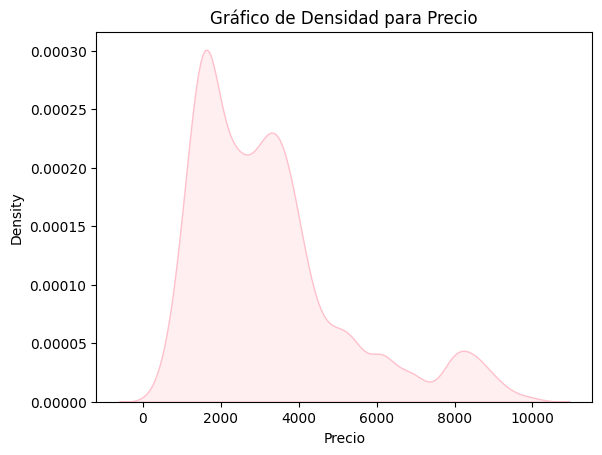

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x='precio', fill=True, color = "pink")

plt.xlabel('Precio')
plt.title('Gráfico de Densidad para Precio')
plt.show()


Gráfico de densidad para Variabilidad

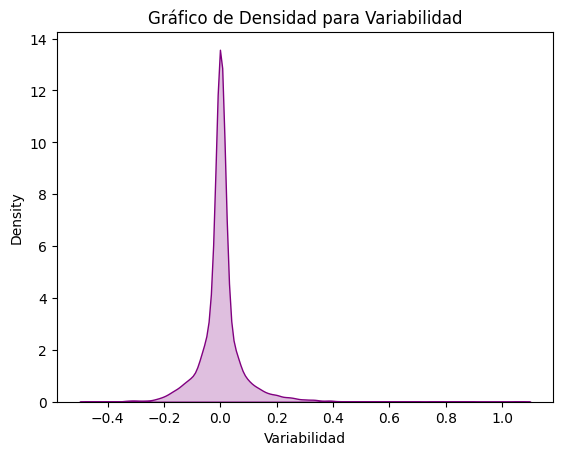

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x='variabilidad', fill=True, color = "purple")

plt.xlabel('Variabilidad')
plt.title('Gráfico de Densidad para Variabilidad')
plt.show()

Gráfico de dispersión para Precio vs Variabilidad

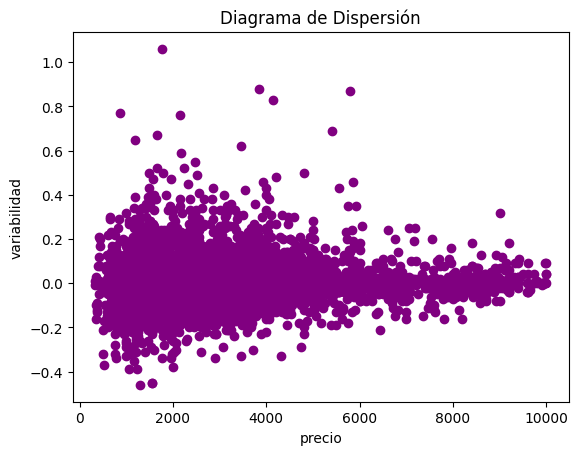

In [389]:
import matplotlib.pyplot as plt

plt.scatter(df['precio'], df['variabilidad'], c='purple')
plt.title('Diagrama de Dispersión')
plt.xlabel('precio')
plt.ylabel('variabilidad')
plt.show()


Diagrama de Violín para Precio

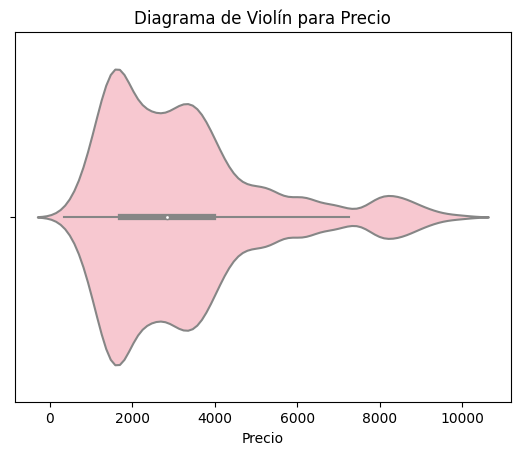

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=df, x='precio', color='pink')

plt.xlabel('Precio')
plt.title('Diagrama de Violín para Precio')

plt.show()


Diagrama de Violín para Variabilidad

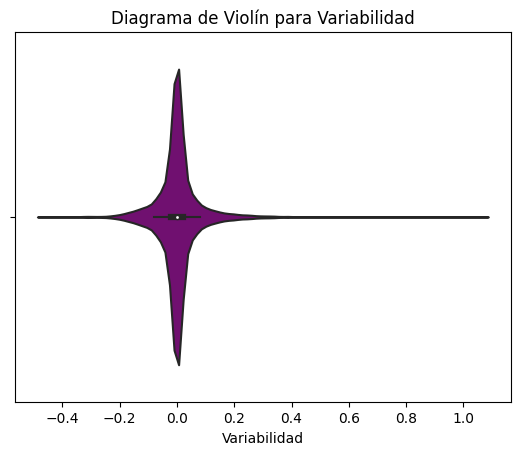

In [391]:
sns.violinplot(data=df, x='variabilidad', color='purple')
plt.xlabel('Variabilidad')
plt.title('Diagrama de Violín para Variabilidad')

plt.show()

Gráfico de Dispersión con línea de Regresión

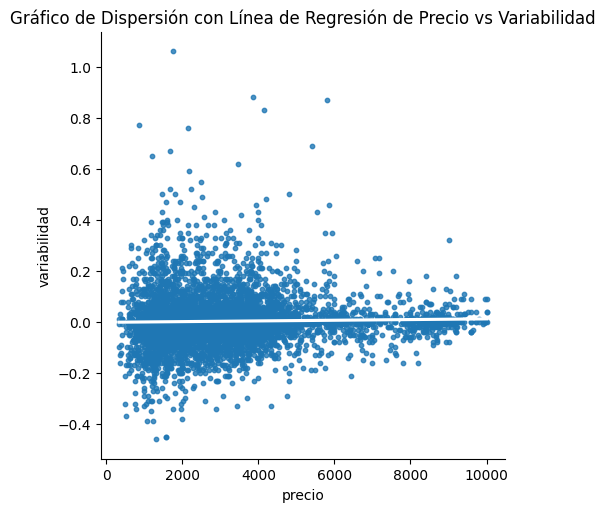

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=df, x='precio', y='variabilidad', scatter_kws={'s': 10}, line_kws={'color': 'white'})

plt.title('Gráfico de Dispersión con Línea de Regresión de Precio vs Variabilidad')

plt.show()


Q-Q plot de Precio

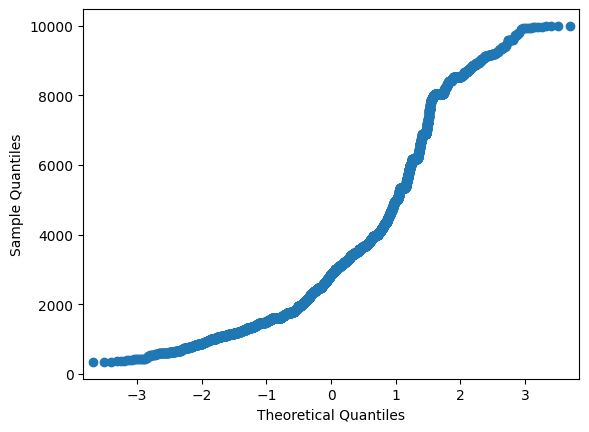

In [393]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.DataFrame(df)

a = np.random.normal(5, 5, 250)
sm.qqplot(df['precio'])
plt.show()



Q-Q plot de Variabilidad

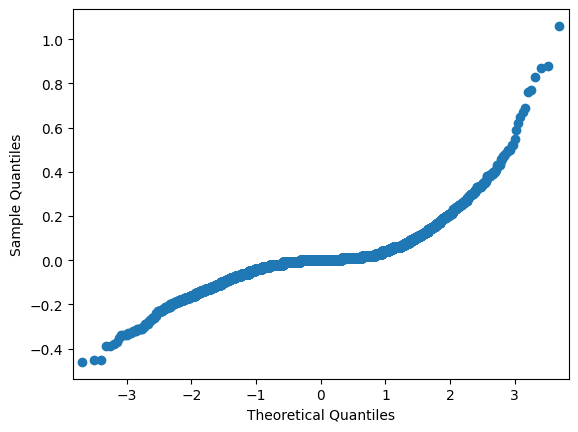

In [394]:
df = pd.DataFrame(df)

a = np.random.normal(5, 5, 250)
sm.qqplot(df['variabilidad'])
plt.show()
